In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../db/flights_2008.csv")

# Completed / Cancelled
completed = df[df["Cancelled"] == 0].copy()
cancelled = df[df["Cancelled"] == 1].copy()

# DepHour (аккуратно, чтобы не было SettingWithCopy)
completed["DepHour"] = ((completed["DepTime"] - 1) // 100).astype("Int64")
cancelled["DepHour"] = ((cancelled["DepTime"] - 1) // 100).astype("Int64")

# Route
df["Route"] = df["Origin"].astype(str) + "->" + df["Dest"].astype(str)
completed["Route"] = completed["Origin"].astype(str) + "->" + completed["Dest"].astype(str)

Consider the following terms we use:
* unique flight – a record (row) in the dataset
* completed flight – flight that is not cancelled (Cancelled==0 in the dataset)
* flight code – a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code – a three letter airport alias from 'Origin or 'Dest' columns

**Check the number of rows and columns and print column names.**

In [7]:
print(df.shape)
print(df.columns)

(7009728, 30)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Route'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [8]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Route
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IAD->TPA
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IAD->TPA
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IND->BWI
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,IND->BWI
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,IND->BWI


**Transpose the frame to see all features at once.**

In [9]:
print(df.T)

                    0         1         2         3         4         5        \
Year                   2008      2008      2008      2008      2008      2008   
Month                     1         1         1         1         1         1   
DayofMonth                3         3         3         3         3         3   
DayOfWeek                 4         4         4         4         4         4   
DepTime              2003.0     754.0     628.0     926.0    1829.0    1940.0   
CRSDepTime             1955       735       620       930      1755      1915   
ArrTime              2211.0    1002.0     804.0    1054.0    1959.0    2121.0   
CRSArrTime             2225      1000       750      1100      1925      2110   
UniqueCarrier            WN        WN        WN        WN        WN        WN   
FlightNum               335      3231       448      1746      3920       378   
TailNum              N712SW    N772SW    N428WN    N612SW    N464WN    N726SW   
ActualElapsedTime     128.0 

**Examine data types of all features and total dataframe size in memory.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

**Get basic statistics of each feature.**

In [11]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


**Count unique Carriers and plot their relative share of flights:**

In [5]:
df['UniqueCarrier'].nunique()

20

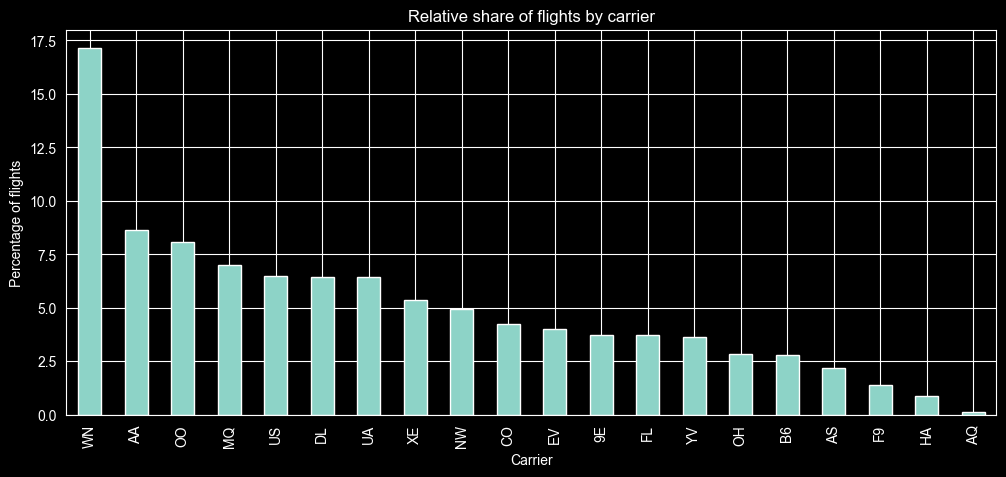

In [12]:
carrier_share = df['UniqueCarrier'].value_counts(normalize=True) * 100

carrier_share.plot(kind='bar', figsize=(12, 5))
plt.ylabel('Percentage of flights')
plt.xlabel('Carrier')
plt.title('Relative share of flights by carrier')
plt.show()

**Number of flights by days of week and months:**

In [16]:
df['DayOfWeek'].value_counts().sort_index()

DayOfWeek
1    1036201
2    1032049
3    1039665
4    1032224
5    1035166
6     857536
7     976887
Name: count, dtype: int64

In [53]:
df['DayofMonth'].value_counts().sort_index()

DayofMonth
1     229292
2     230865
3     233259
4     228649
5     228156
6     228117
7     233797
8     229578
9     227064
10    232989
11    233448
12    227247
13    227233
14    234285
15    230379
16    229085
17    233202
18    234146
19    227487
20    229165
21    234533
22    230557
23    229039
24    229797
25    228095
26    226590
27    222876
28    229613
29    231532
30    211685
31    127968
Name: count, dtype: int64

How many unique carriers are there in our dataset?**


In [54]:
df['UniqueCarrier'].nunique()

20

 We have  both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference?** <br>


In [55]:
df['Cancelled'].value_counts()

Cancelled
0    6872294
1     137434
Name: count, dtype: int64

In [56]:
df['Cancelled'].value_counts(normalize=True) * 100

Cancelled
0    98.039382
1     1.960618
Name: proportion, dtype: float64

 Find a flight with the longest departure delay and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**


In [57]:
df_completed = df[df['Cancelled'] == 0]
max_DepDelay = df.loc[df_completed['DepDelay'].idxmax()]
max_DepDelay

Year                   2008
Month                     4
DayofMonth               10
DayOfWeek                 4
DepTime               724.0
CRSDepTime             1417
ArrTime               858.0
CRSArrTime             1605
UniqueCarrier            NW
FlightNum              1699
TailNum              N3324L
ActualElapsedTime     154.0
CRSElapsedTime        168.0
AirTime               132.0
ArrDelay             2453.0
DepDelay             2467.0
Origin                  CLT
Dest                    MSP
Distance                930
TaxiIn                  8.0
TaxiOut                14.0
Cancelled                 0
CancellationCode        NaN
Diverted                  0
CarrierDelay         2436.0
WeatherDelay            0.0
NASDelay                0.0
SecurityDelay           0.0
LateAircraftDelay      17.0
Name: 2235378, dtype: object

In [58]:
max_ArrDelay = df.loc[df_completed['ArrDelay'].idxmax()]
max_ArrDelay

Year                   2008
Month                     2
DayofMonth                3
DayOfWeek                 7
DepTime              1117.0
CRSDepTime             1820
ArrTime              2256.0
CRSArrTime              555
UniqueCarrier            NW
FlightNum               808
TailNum              N817NW
ActualElapsedTime     459.0
CRSElapsedTime        455.0
AirTime               437.0
ArrDelay             2461.0
DepDelay             2457.0
Origin                  HNL
Dest                    MSP
Distance               3972
TaxiIn                  6.0
TaxiOut                16.0
Cancelled                 0
CancellationCode        NaN
Diverted                  0
CarrierDelay         1455.0
WeatherDelay            0.0
NASDelay                4.0
SecurityDelay           0.0
LateAircraftDelay    1002.0
Name: 1018798, dtype: object

In [59]:
if max_DepDelay['Dest'] == max_ArrDelay['Dest']:
    print('Yes, they have the same destination airport\nDestination airport code: ', max_ArrDelay['Dest'])
else:
    print('No, they do not have the same destination airport')

Yes, they have the same destination airport
Destination airport code:  MSP


In [60]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Find the carrier that has the greatest number of cancelled flights.**


In [ ]:
df.groupby('UniqueCarrier')['Cancelled'].sum().sort_values(ascending=False).head(1)

**Let's examine departure time and consider distribution by hour (column `DepHour` that we've created earlier). Which hour has the highest percentage of flights?**<br>

*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).


In [85]:
df_completed = df[(df['Cancelled'] == 0) & (df['DepDelay'].isnull() == False)]
df_completed['DepHour'] = ((df_completed['DepTime'] - 1) // 100).astype('Int64')
df_completed['DepHour'].value_counts(sort=True, normalize=True).head(1).round(4) * 100

DepHour
8    6.55
Name: proportion, dtype: Float64

**OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>


In [86]:
df_completed = df[(df['Cancelled'] == 1) & (df['DepDelay'].isnull() == False)]
df_completed['DepHour'] = ((df_completed['DepTime'] - 1) // 100).astype('Int64')
df_completed['DepHour'].value_counts(sort=True, normalize=True).tail(1).round(4) * 100

DepHour
2    0.08
Name: proportion, dtype: Float64

**Is there any hour that didn't have any cancelled flights at all? Check all that apply.**


In [87]:
df['DepHour'] = ((df['DepTime'] - 1) // 100).astype('Int64')

all_hours = set(df['DepHour'].dropna().unique())

cancelled_hours = set(
    df[df['Cancelled'] == 1]['DepHour'].dropna().unique()
)

print(all_hours - cancelled_hours)

{np.int64(3)}


Да есть в 3 часа нету отмененных рейсов


**Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*Hint:* Consider only *completed* flights.


In [90]:
df_completed

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour
5441446,2008,10,20,1,854.0,855,NaN,1105,WN,425,...,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,8
5463024,2008,10,27,1,1622.0,1420,NaN,1520,WN,27,...,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN,16
5484245,2008,10,25,6,1323.0,1255,NaN,1442,XE,2347,...,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,13
5486533,2008,10,22,3,1644.0,1645,NaN,1808,XE,2308,...,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN,16
5486624,2008,10,22,3,1735.0,1740,NaN,1928,XE,2431,...,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006809,2008,12,11,4,1026.0,955,NaN,1219,DL,892,...,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,10
7007049,2008,12,11,4,741.0,745,NaN,923,DL,1119,...,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,7
7008584,2008,12,12,5,703.0,630,NaN,734,DL,1372,...,33.0,1,B,0,NaN,NaN,NaN,NaN,NaN,7
7008586,2008,12,12,5,728.0,730,NaN,839,DL,1374,...,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN,7


In [95]:
hour_counts = df_completed['DepHour'].value_counts(sort=True).head(1)
hour_counts

DepHour
21    84
Name: count, dtype: Int64

**Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.



In [98]:
avg_dep_delay_by_hour = (
    df_completed
    .groupby('DepHour')['DepDelay']
    .mean().sort_values()
)

avg_dep_delay_by_hour

DepHour
4     -11.000000
5      -1.366667
6       1.392405
7       7.101266
8      10.237500
12     14.096154
9      17.607143
11     34.135593
10     35.071429
13     36.941176
14     42.800000
16     51.528571
19     60.207317
15     61.256757
22     66.685185
17     70.360000
18     72.553846
21     80.464286
20     86.540000
23    165.208333
0     214.285714
2     382.000000
1     384.000000
Name: DepDelay, dtype: float64

In [100]:
early_hours = avg_dep_delay_by_hour[avg_dep_delay_by_hour < 0]
early_hours

DepHour
4   -11.000000
5    -1.366667
Name: DepDelay, dtype: float64

**Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>


In [102]:
carrier = df_completed.groupby('UniqueCarrier')['Cancelled'].sum().idxmax()
carrier# You code here

'OO'

**Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**


In [29]:
# You code here

**Plot distributions of flight cancellation reasons (CancellationCode).**

**What is the most frequent reason for flight cancellation?**

In [30]:
# You code here 

**Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 


In [31]:
# You code here 

**Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_ : consider only positive delays


In [32]:
# You code here

**Examine the hourly distribution of departure times.**



In [33]:
# You code here 

**Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**


In [34]:
# You code here

**Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**


In [35]:
# You code here

**Which month has the greatest number of cancellations due to Carrier?** 


In [36]:
# You code here

**Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**


In [37]:
# You code here

**Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

In [38]:
# You code here